In [36]:
%matplotlib inline

In [6]:
import pymongo
import pandas as pd

In [2]:
#configuracion mongo y conexion a db
client = pymongo.MongoClient("mongodb://localhost:27017/")
sentencias_db = client['Sentencias']
sentencias_coll = sentencias_db['Sentencias Judiciales minuscula']

In [3]:
with open("./Extraccion delitos/delitos.txt", encoding="utf-8") as file:
    lista_delitos = [l.rstrip("\n") for l in file]

In [31]:
df = pd.DataFrame(index=lista_delitos)
df['conteo'] = 0
df.head()

,conteo
traición,0
espionaje,0
delitos cometidos por extranjeros,0
actos hostiles,0
revelación de secretos,0


In [25]:
df.loc[df['Delito'] == 'espionaje']['conteo']


1    0
Name: conteo, dtype: int64

In [32]:
for delito in lista_delitos:
    veces_mencionado = sentencias_coll.count_documents( {"delitos": delito} )
    df['conteo'][delito]= veces_mencionado

In [56]:
df.sort_values('conteo',ascending=False)
df_mas_mencionados = df.sort_values('conteo',ascending=False).head(16)
df_mas_mencionados.drop('violación',inplace=True)
df_mas_mencionados['delito'] = df_mas_mencionados.index

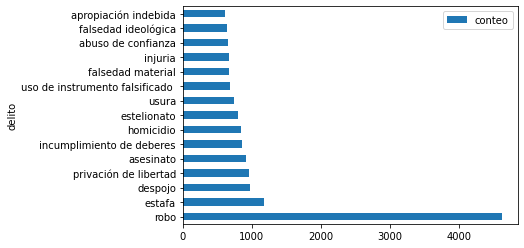

In [57]:
ax = df_mas_mencionados.plot.barh(x='delito', y='conteo', rot=0)